# Module 1: Data Science Fundamentals

## Sprint 3: Intro to Modeling

## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

## Background

For our sprint's project, we'll analyze some popular songs from Spotify. The dataset contains a number of variables that describe the songs, which we'll use to predict which genre it belongs to. 

---------

## How to start?

Download the dataset [from Kaggle](https://www.kaggle.com/insiyeah/musicfeatures) (`data.csv`) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

## Concepts to explore

We will use dimensionality reduction, do some clustering with K-means and perform modeling using logistic regression.

Look into the follow concepts, which will help you when modelling:
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
- [Homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html)

## Requirements

* Perform basic EDA.
* Perform dimensionality reduction on song features, verify data separability by genre (PCA and/or t-SNE).
* Infer genre using song features with logistic regression.
* Cluster songs by features using k-Means algorithm
    - Find the most appropriate amount of clusters
    - Evaluate your clusters using silhouette and homogeneity scores
    - Draw conclusions about the goodness of the clusters

## Evaluation Criteria

- PCA/TSNE performed correctly and results analyzed
- Clustering done correctly and results analyzed
- Adherence to the requirements
- Model trained on given data and its performance evaluated
- Code quality


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What does a PCA do? How are principal components selected?
- Explain linear regression. What are the main assumptions of linear regression?
- What is K-means clustering? How does it work?
- When would you prefer T-SNE over. PCA?

#Introduction:

This project explores different features extracted from music. The aim is to help machine distinguish between them and categorize them into genres. Each instance of the dataset have 30 features including the Id and genre. Below are the features.


filename,  tempo,  beats,  chroma_stft,  rmse,  spectral_centroid,  spectral_bandwidth,  rolloff,  zero_crossing_rate,  mfcc1,  mfcc2,  mfcc3, mfcc4,  mfcc5,  mfcc6,  mfcc7,  mfcc8,  mfcc9,  mfcc10,  mfcc11,  mfcc12,  mfcc13,  mfcc14,  mfcc15,  mfcc16,  mfcc17,  mfcc18,  mfcc19,  mfcc20,  and  label

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('drive/My Drive/Turing')

In [4]:
music_data = pd.read_csv('data.csv')

#EDA

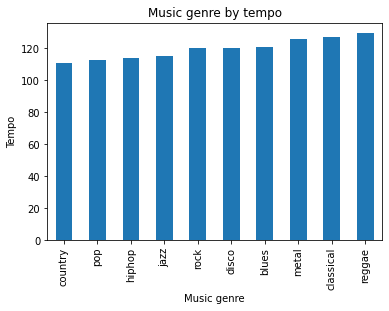

In [5]:
music_data.groupby('label')['tempo'].mean().sort_values().plot.bar();
plt.xlabel('Music genre');
plt.ylabel('Tempo');
plt.title('Music genre by tempo');

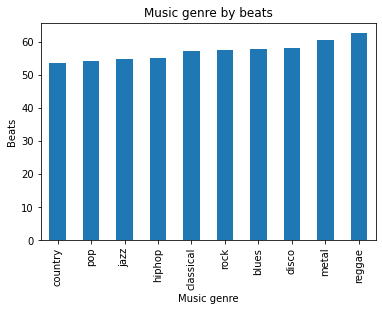

In [6]:
music_data.groupby('label')['beats'].mean().sort_values().plot.bar();
plt.xlabel('Music genre');
plt.ylabel('Beats');
plt.title('Music genre by beats'); 

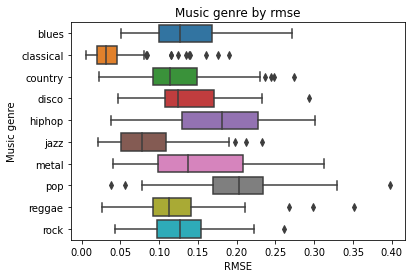

In [7]:
sns.boxplot(x=music_data.rmse, y=music_data.label).set_title('y');
plt.xlabel('RMSE');
plt.ylabel('Music genre');
plt.title('Music genre by rmse');

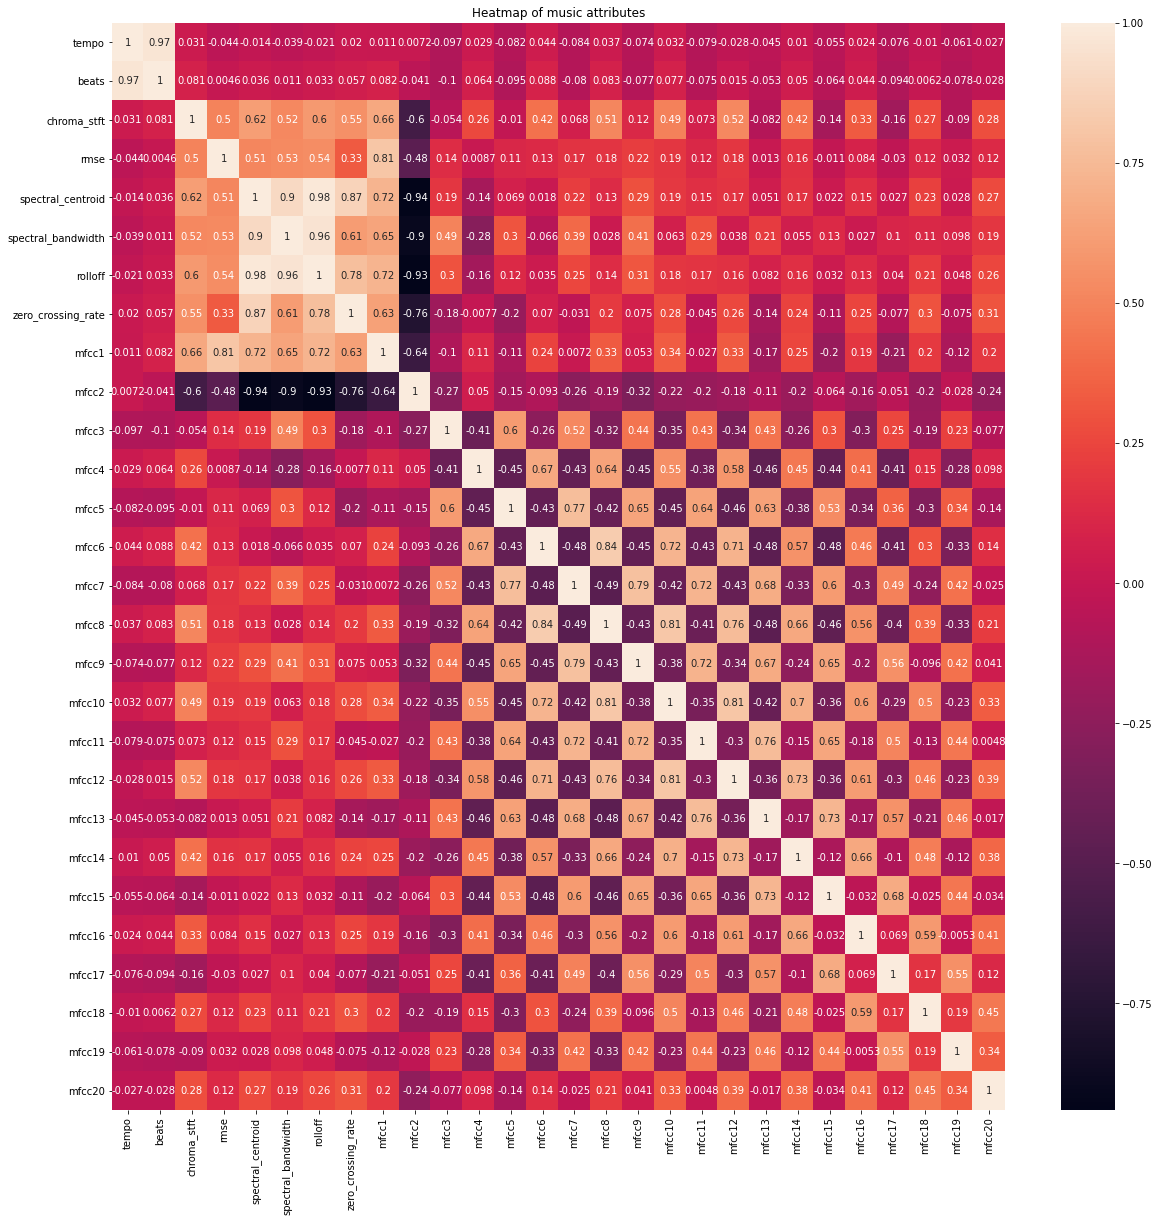

In [8]:
plt.figure(figsize = (20,20))
sns.heatmap(music_data.corr(), annot=True);
plt.title('Heatmap of music attributes');

#Dimensionality Reduction with PCA

In [9]:
X = music_data.drop(['label', 'filename'], axis=1)
y = music_data['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [11]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [12]:
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)

In [13]:
explained_variance = pca.explained_variance_ratio_
np.sum(explained_variance)

0.8719306325243821

In [14]:
music_data_pc = pd.DataFrame(data= X_train, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6','pc7', 'pc8','pc9'])

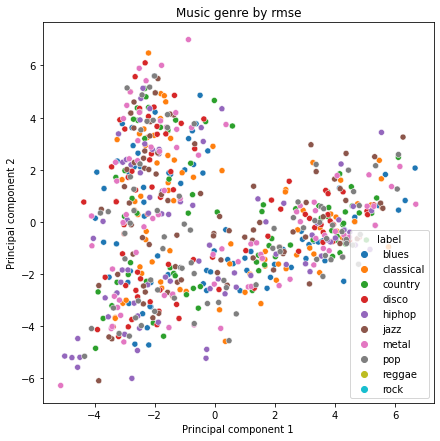

In [15]:
plt.figure(figsize = (7,7));
sns.scatterplot(x = music_data_pc['pc1'],y = music_data_pc['pc2'],hue =y_train);
plt.xlabel('Principal component 1');
plt.ylabel('Principal component 2');
plt.title('Music genre by rmse');

The 2-dimensional pca plot shows no data separability by genre.

#Classification with Logistic Regression

In [16]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)

In [17]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [18]:
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

Accuracy: 0.505


#Clustering with Kmeans

In [19]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

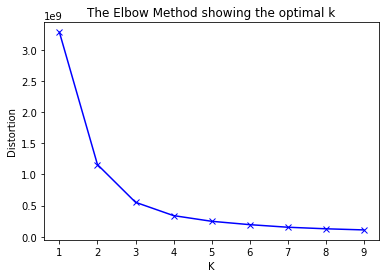

In [20]:
plt.plot(K, distortions, 'bx-');
plt.xlabel('K');
plt.ylabel('Distortion');
plt.title('The Elbow Method showing the optimal k');

In [21]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_train_scaled )
centroids = kmeans.cluster_centers_

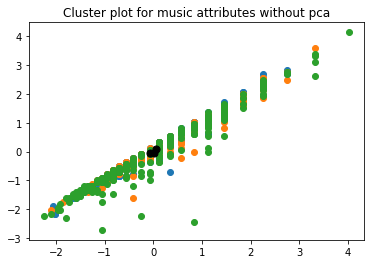

In [22]:
unique_clusters = np.unique(clusters)

for i in unique_clusters:
    plt.scatter(X_train_scaled [clusters == i , 0] , X_train_scaled [clusters == i , 1] , label = i);
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'black');
plt.title('Cluster plot for music attributes without pca');


In [23]:
print('Silhouette score without PCA: ', silhouette_score(X_train_scaled , clusters))

Silhouette score without PCA:  0.2730252014166857


In [24]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(music_data_pc)
centroids = kmeans.cluster_centers_

In [25]:
music_data_pc = np.array(music_data_pc)

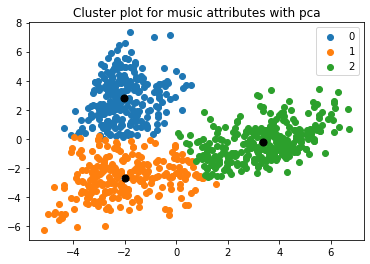

In [26]:
unique_clusters = np.unique(clusters)

for i in unique_clusters:
    plt.scatter(music_data_pc[clusters == i , 0] , music_data_pc[clusters == i , 1] , label = i);
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'black');
plt.legend();
plt.title('Cluster plot for music attributes with pca');

In [27]:
print('Silhouette score with PCA: ', silhouette_score(music_data_pc, clusters))

Silhouette score with PCA:  0.31739748722225225


Considering the two clusters plotted, the one plotted on the entire dataset without any form of dimensionality reduction shows no distinct clusters and with silhouette score of 0.27, this means the clusters are overlapping. The PCA attributes formed better clusters and slightly better silhouette score of 0.32, this also indicates that the clusters overlap, i.e there's no clear separation among clusters.

#Conclusion

Using Kmeans algorithm on the music data, the clusters formed are not good enough to make inferences as indicated in the plots and evaluations. More exploration and feature engineering is required. Also, a different clustering algorithm can also be used.

